# Caso de estudio Módulo 2 – Aprendizaje Supervisado
por: Osiris Contreras Trillos, Maritza Zapata, Juan José Molina, David Toro

In [50]:
import warnings
warnings.filterwarnings("ignore")

In [51]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

La compañía E-Corp cuya principal operación es la venta de producto de lujo, ha lanzado desde hace
un año su sito de e-commerce donde ofrecen una variedad importante de los productos que pueden
encontrarse en sus tiendas físicas. El objetivo de esta estrategia es expandir su base de clientes
actuales, a través de nuevos canales de compra y tener mayor cobertura en sitios donde no se
encuentran tiendas físicas actualmente.
Sin embargo, en los últimos informes presentados a la dirección, se evidencia que las ventas que son
atribuidas al canal digital (e-commerce) no representan un porcentaje importante de participación
con respecto al total de las ventas. Esto ha hecho que el retorno a la inversión realizada para la
creación y mantenimiento del sitio web no sea la esperada por los directivos. El área encargada del
canal digital, considera que las campañas de marketing no están siendo efectivas y este gasto
representa un rubro importante que puede llegar a optimizarse. Estas son algunas de las hipótesis que
el equipo de canales digitales cree sobre el problema de ventas:
● Actualmente las campañas de marketing enfocadas a la adquisición de nuevos clientes utilizan
atributos muy generales que pueden no ser relevantes para influir en la decisión de compra.
● No se tiene claro cuáles son los clientes potenciales o con mayor probabilidad de realizar una
compra una vez visiten el sitio web, por lo tanto la inversión en pauta puede no estar llegando
a los clientes que generan ingresos.
Por ello, la dirección ha contratado a su equipo de consultores para abordar el problema descrito a
través del uso de modelos de ML. En otras palabras, quieren conocer si pueden anticiparse a la
identificación de clientes potenciales y así optimizar su inversión en pauta digital utilizando atributos
que describan mejor a estos clientes potenciales.

## a. Diseño de solución propuesto
El diseño de solución propuesto para abordar el problema de E-Corp con respecto a la optimización de su inversión en el canal digital consta de los siguientes pasos:

Análisis de datos:

Se realizará un análisis exploratorio de los datos disponibles para comprender su estructura y encontrar patrones relevantes.
Selección de características:

Se identificarán las características más importantes que describan a los clientes potenciales, incluyendo variables demográficas y de comportamiento en el sitio web.
Preprocesamiento de datos:

Se limpiarán los datos y se realizará el preprocesamiento necesario, como la codificación de variables categóricas y el manejo de valores faltantes.
Modelado de Machine Learning:

Se utilizarán técnicas de aprendizaje supervisado, como Regresión Logística o Árboles de Decisión, para construir un modelo predictivo que identifique a los clientes potenciales.
Evaluación del modelo:

Se evaluará el rendimiento del modelo utilizando métricas de clasificación como precisión, recall y F1-score, asegurando que pueda identificar efectivamente a los clientes potenciales.
Optimización de inversión en pauta digital:

Se utilizarán las predicciones del modelo para dirigir las campañas de marketing a los segmentos de clientes identificados como potenciales compradores, mejorando así la eficacia de las campañas y el retorno de la inversión.
Iteración y mejora continua:

Este enfoque integral combina análisis de datos, modelado de machine learning y optimización estratégica para abordar el desafío específico de E-Corp y mejorar su rendimiento en el canal digital.

## b. Limpieza y transformación de los datos

In [52]:
# Cargar data, especificando que la primera fila es una fila de encabezados
url = "https://raw.githubusercontent.com/osiris-contreras/Osiris-Contreras-Trillos-/main/ecommerce-data.csv"
names = ['Reviews', 'Reviews_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Purchase']
df_original = pd.read_csv(url, names=names, header=0)
print(df_original.shape)

(12330, 18)


In [53]:
# Tamaño del dataset
print('Numero de filas:', df_original.shape[0]," ",'Numero de columnas:', df_original.shape[1])

Numero de filas: 12330   Numero de columnas: 18


In [54]:
# Información general del dataset
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reviews                  12330 non-null  int64  
 1   Reviews_Duration         12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Basándonos en los resultados de info, vemos que no hay valores nulos en los datos y los diferentes tipos de datos de las columnas

In [55]:
# Descripción estadística general de las variables numéricas
df_original.describe()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [56]:
# Descripción estadística general de las variables categóricas
df_original.describe(include=['object'])

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


Basándonos en los resultados de la descripción, vemos que estas variables son las primeras y más frecuentes en el conjunto de datos: May y Returnin_Visitor

## análisis exploratorio de los datos

In [58]:
# Separación de variables númericas y categóricas
cats = ['Month', 'VisitorType']
nums = ['Reviews','Reviews_Duration',	'Informational', 'Informational_Duration',	'ProductRelated',	'ProductRelated_Duration',	'BounceRates',	'ExitRates',	'PageValues',	'SpecialDay',	'OperatingSystems',	'Browser',	'Region', 'TrafficType']

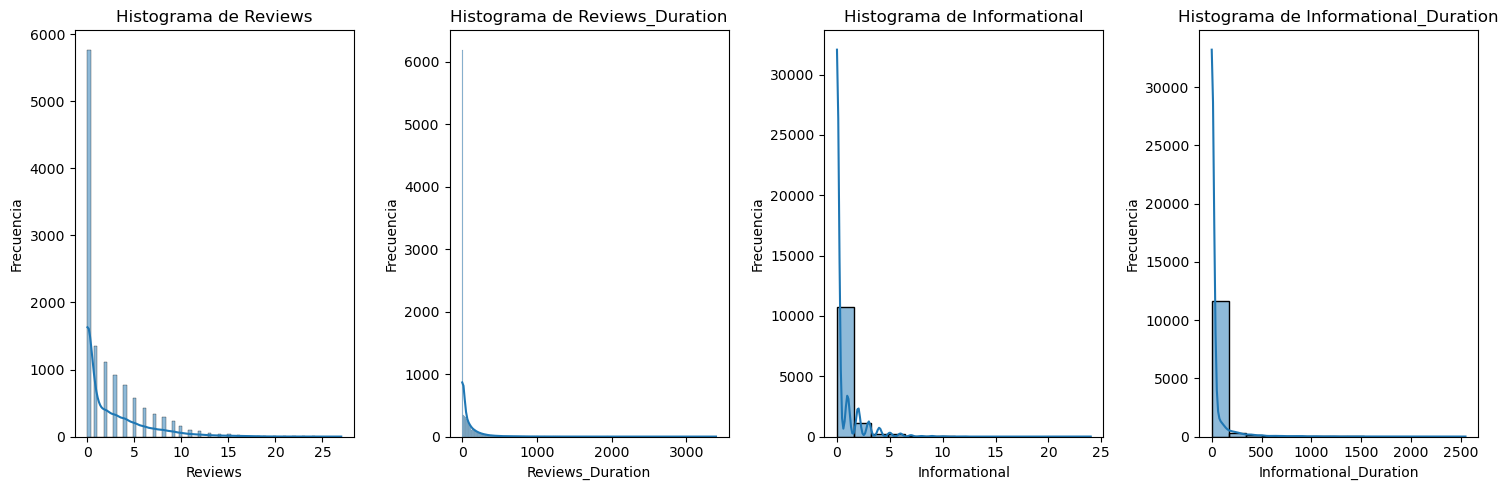

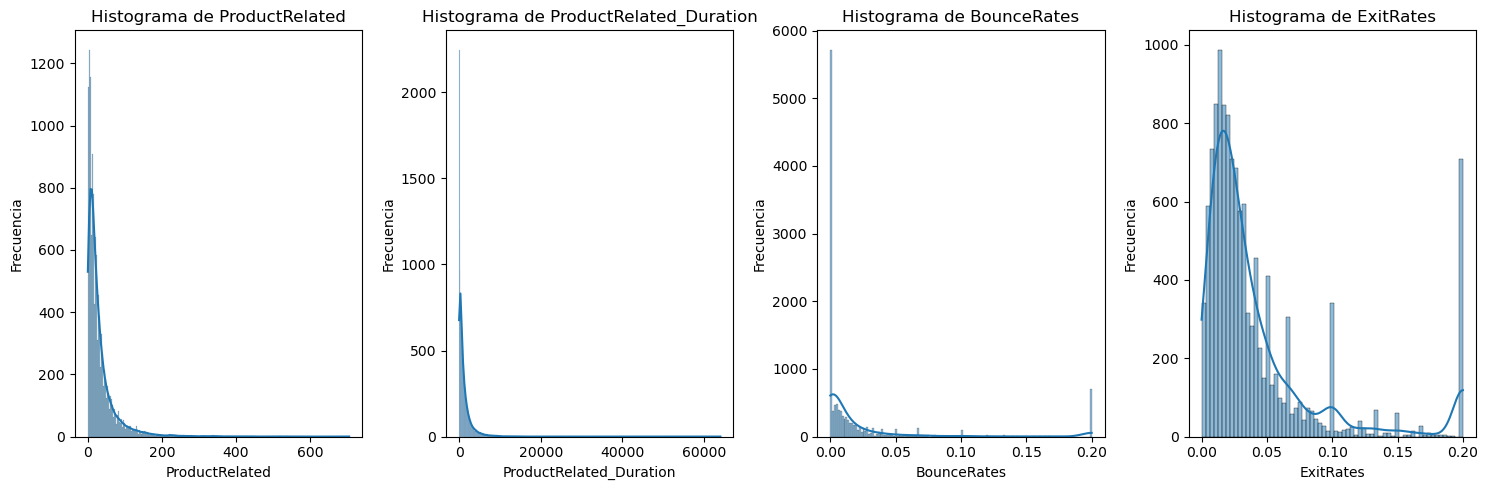

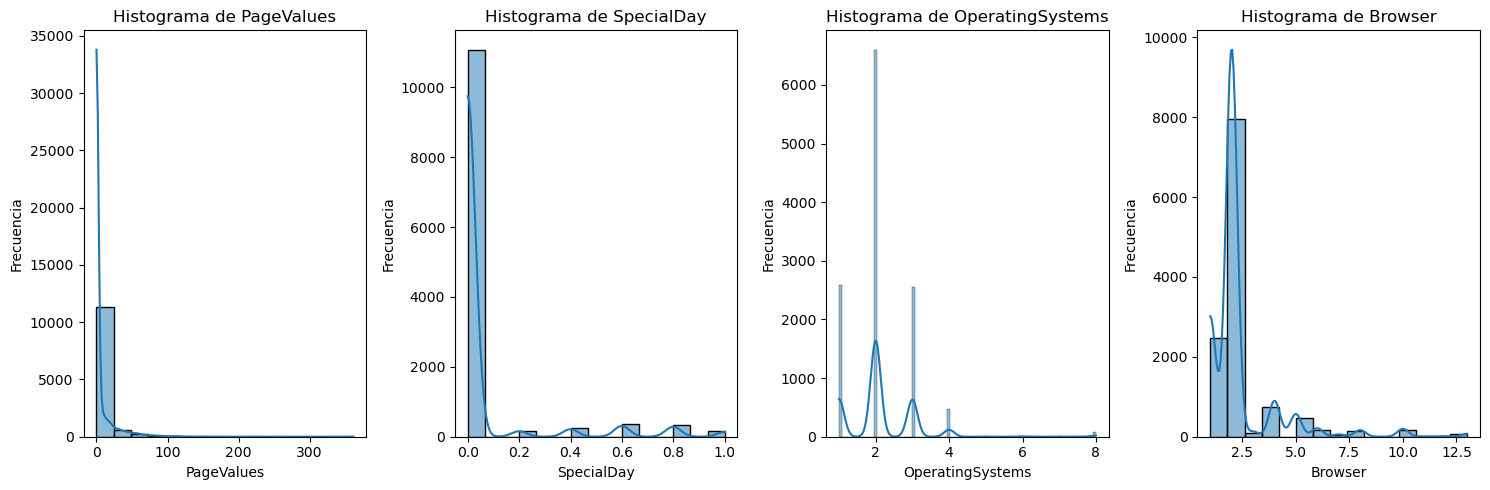

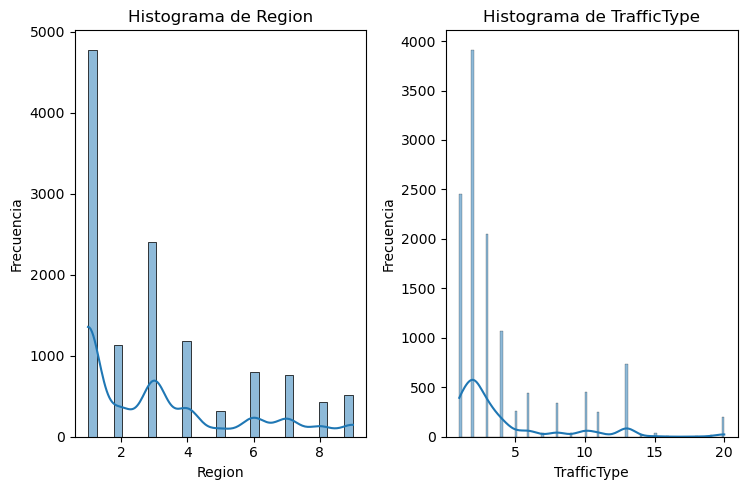

In [59]:
# Configurar el número de columnas en la disposición de subplots
num_columnas = 4

# Histogramas para variables numéricas
for i, num_var in enumerate(nums):
    if i % num_columnas == 0:
        plt.figure(figsize=(15, 5))
    plt.subplot(1, num_columnas, i % num_columnas + 1)
    sns.histplot(df_original[num_var], kde=True)
    plt.title(f'Histograma de {num_var}')
    plt.xlabel(num_var)
    plt.ylabel('Frecuencia')
    if (i + 1) % num_columnas == 0 or i == len(nums) - 1:
        plt.tight_layout()
        plt.show()

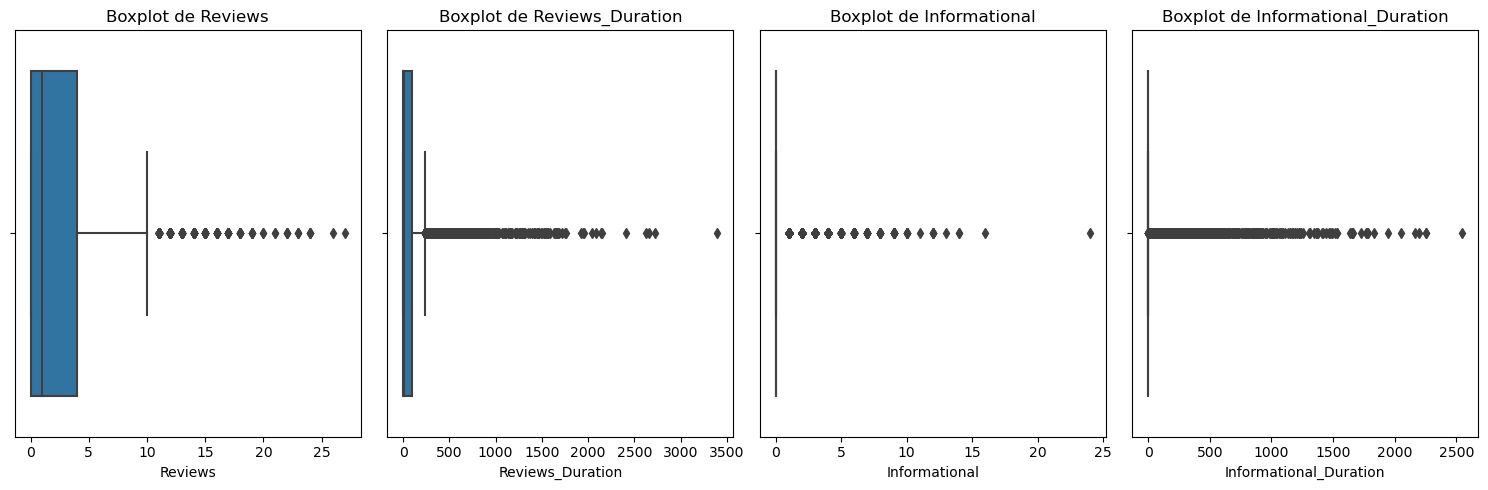

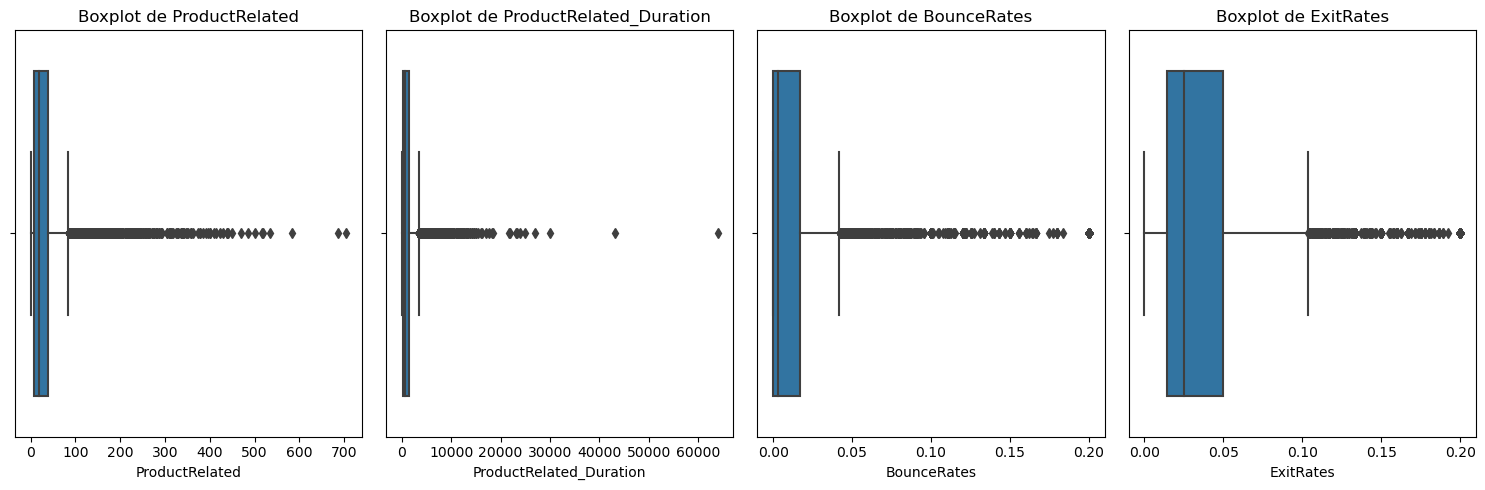

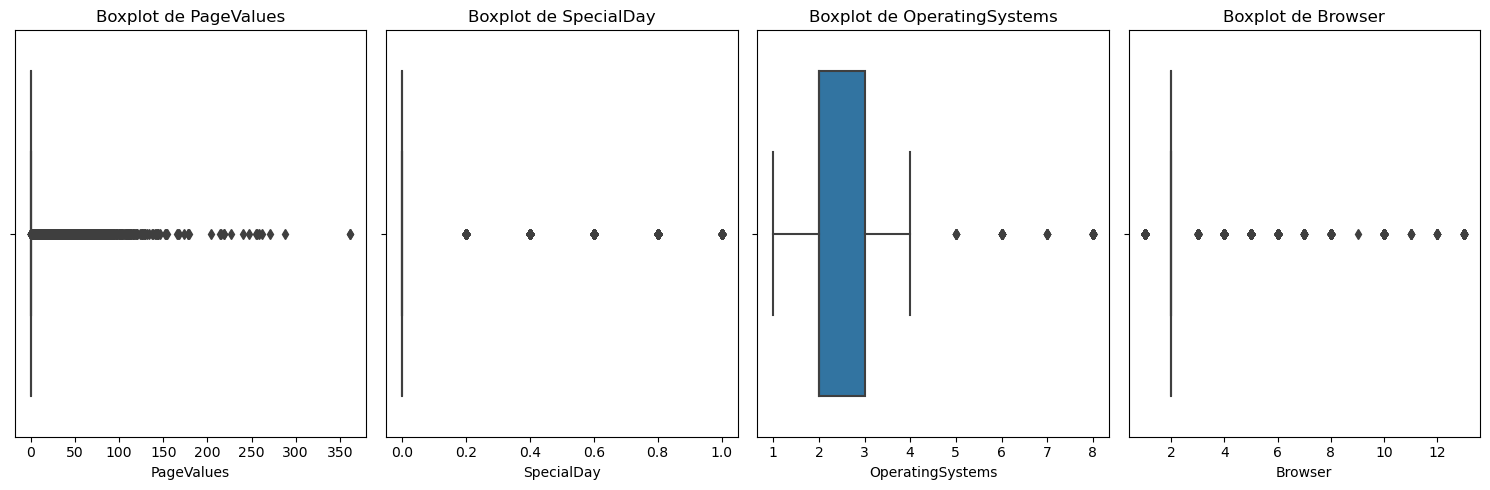

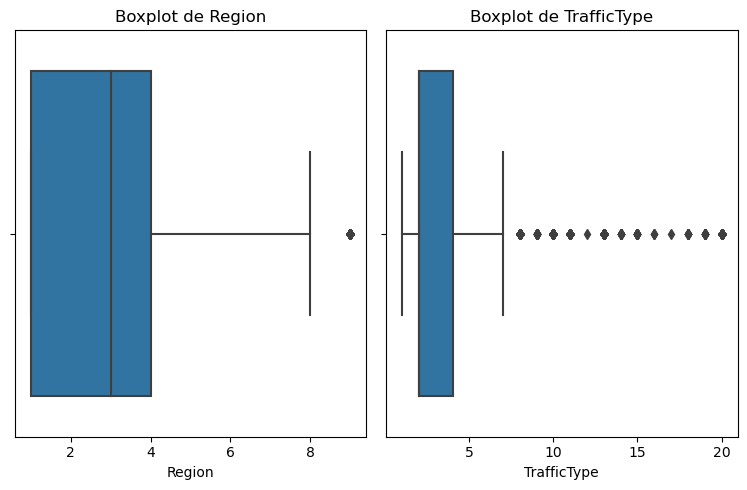

In [60]:
# Boxplots para variables numéricas
for i, num_var in enumerate(nums):
    if i % num_columnas == 0:
        plt.figure(figsize=(15, 5))
    plt.subplot(1, num_columnas, i % num_columnas + 1)
    sns.boxplot(x=df_original[num_var])
    plt.title(f'Boxplot de {num_var}')
    plt.xlabel(num_var)
    if (i + 1) % num_columnas == 0 or i == len(nums) - 1:
        plt.tight_layout()
        plt.show()

como se observa en los boxplots, todas las columnas contienen en su mayoría datos atípicos


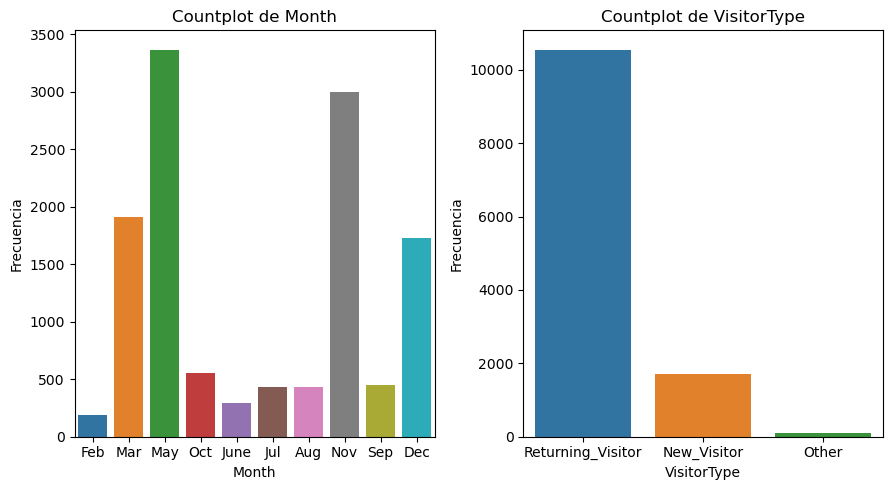

In [61]:
# Countplots para variables categóricas
for i, cat_var in enumerate(cats):
    if i % num_columnas == 0:
        plt.figure(figsize=(18, 5))
    plt.subplot(1, num_columnas, i % num_columnas + 1)
    sns.countplot(x=cat_var, data=df_original)
    plt.title(f'Countplot de {cat_var}')
    plt.xlabel(cat_var)
    plt.ylabel('Frecuencia')
    if (i + 1) % num_columnas == 0 or i == len(cats) - 1:
        plt.tight_layout()
        plt.show()

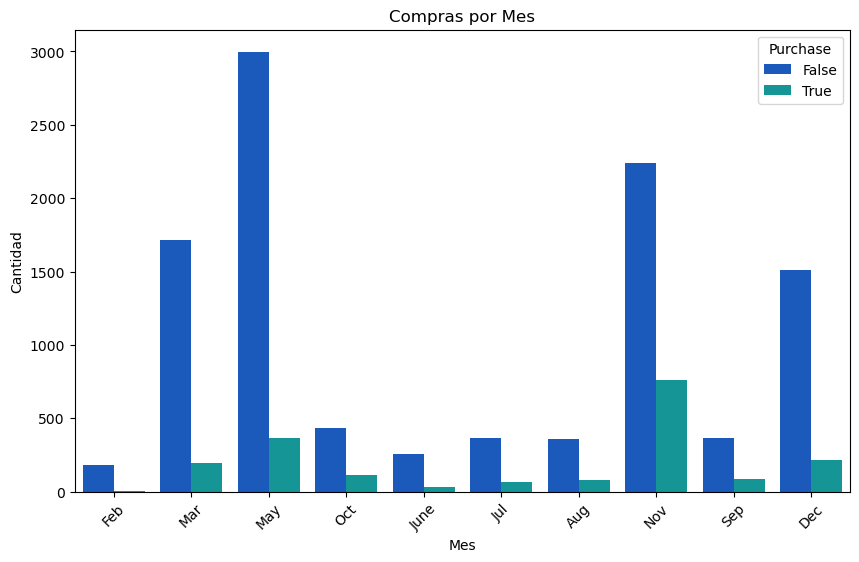

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para el mes de compra
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='Purchase',palette='winter', data=df_original)
plt.title('Compras por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

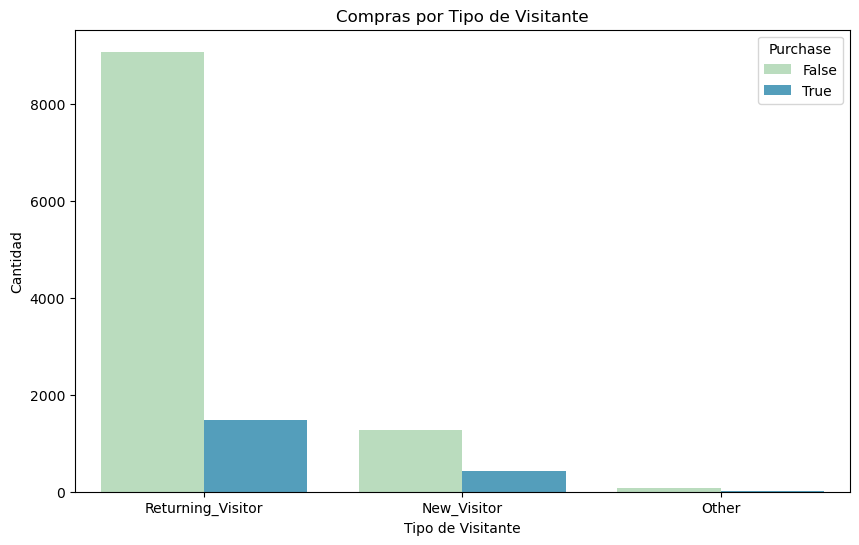

In [17]:
# Gráfico de barras apiladas para el tipo de usuario y compras
plt.figure(figsize=(10, 6))
sns.countplot(x='VisitorType', hue='Purchase',palette='GnBu', data=df_original)
plt.title('Compras por Tipo de Visitante')
plt.xlabel('Tipo de Visitante')
plt.ylabel('Cantidad')
plt.show()

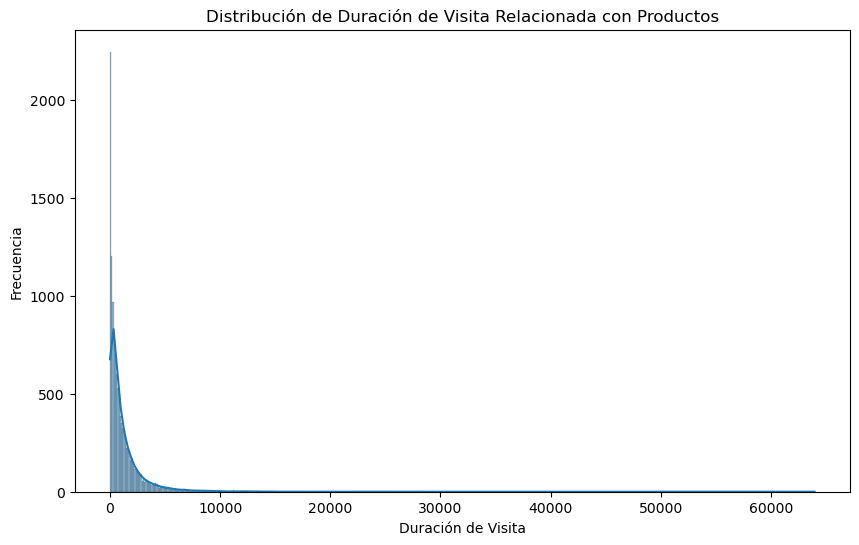

In [18]:
# Gráfico de distribución para la duración de la visita relacionada con productos
plt.figure(figsize=(10, 6))
sns.histplot(data=df_original, x='ProductRelated_Duration',palette='PuBu', kde=True)
plt.title('Distribución de Duración de Visita Relacionada con Productos')
plt.xlabel('Duración de Visita')
plt.ylabel('Frecuencia')
plt.show()

## Limpieza y transformación de los datos

In [62]:
# Copia del dataset para aplicar transformaciones y limpieza de datos
df1 = df_original.copy()

In [63]:
from sklearn.preprocessing import LabelEncoder

# Codificación de variables categóricas
label_encoder = LabelEncoder()
df1['Month'] = label_encoder.fit_transform(df1['Month'])
df1['VisitorType'] = label_encoder.fit_transform(df1['VisitorType'])

# Conversión de datos booleanos a numéricos
df1['Weekend'] = df1['Weekend'].astype(int)
df1['Purchase'] = df1['Purchase'].astype(int)

print(df1.head())

   Reviews  Reviews_Duration  Informational  Informational_Duration  \
0        0               0.0              0                     0.0   
1        0               0.0              0                     0.0   
2        0               0.0              0                     0.0   
3        0               0.0              0                     0.0   
4        0               0.0              0                     0.0   

   ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  \
0               1                 0.000000         0.20       0.20   
1               2                64.000000         0.00       0.10   
2               1                 0.000000         0.20       0.20   
3               2                 2.666667         0.05       0.14   
4              10               627.500000         0.02       0.05   

   PageValues  SpecialDay  Month  OperatingSystems  Browser  Region  \
0         0.0         0.0      2                 1        1       1   
1         

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reviews                  12330 non-null  int64  
 1   Reviews_Duration         12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int32  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [65]:
df1.describe()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,5.163990,2.124006,2.357097,3.147364,4.069586,1.718329,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,2.370199,0.911325,1.717277,2.401591,4.025169,0.690759,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,7.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


In [66]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Seleccionar las características numéricas a normalizar o estandarizar
caracteristicas_numericas = df1[names]

# Inicializar el escalador MinMaxScaler
min_max_scaler = MinMaxScaler()

# Normalizar las características utilizando MinMaxScaler
caracteristicas_numericas_normalizadas = min_max_scaler.fit_transform(caracteristicas_numericas)

# Inicializar el escalador StandardScaler
standard_scaler = StandardScaler()

# Estandarizar las características utilizando StandardScaler
caracteristicas_numericas_estandarizadas = standard_scaler.fit_transform(caracteristicas_numericas_normalizadas)

# Convertir las características normalizadas y estandarizadas de nuevo a un DataFrame de pandas
nuevo_df = pd.DataFrame(caracteristicas_numericas_estandarizadas, columns= names)

# Mostrar las primeras filas del DataFrame con características estandarizadas y normalizadas
print("\nCaracterísticas estandarizadas:")
print(nuevo_df.info())


Características estandarizadas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reviews                  12330 non-null  float64
 1   Reviews_Duration         12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  float64
 11  OperatingSystems         12330 non-null  float64
 12  Browser                  12330 non-null  float64
 13  Region                   12330 non-null  fl

## Preparación de los datos

In [67]:
# Comprobación de valores duplicados
nuevo_df.duplicated().sum()

125

In [68]:
# Eliminación de valores duplicados
nuevo_df = df1.drop_duplicates()

# Comprobación de valores duplicados
nuevo_df.duplicated().sum()

0

In [69]:
# Separación de caracteristicas y target (X , y)
y = nuevo_df['Purchase']
X = nuevo_df.drop(['Purchase'],axis=1)

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", x_train.shape)
print("Tamaño del conjunto de validación:",  x_test.shape)


Tamaño del conjunto de entrenamiento: (9764, 17)
Tamaño del conjunto de validación: (2441, 17)


## Modelo 1. Random Forest - sin selección de variables

hiperparámetros:
* estimadores: 200
* profundidad máxima: 20
* semilla aleatoria:45

In [70]:
from sklearn.ensemble import RandomForestRegressor
#Crea el modelo
ranfor = RandomForestRegressor(
    n_estimators=200,
    max_depth=20, 
    random_state=45
)

#Calibra el modelo
ranfor.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=45)

In [106]:
#Predicciones sobre el conjunto de train
y_pred_r = ranfor.predict(x_train)

#Exactitud de modelo
print("Accuracy (Train): "+ str(ranfor.score(x_train,y_train)*100) + "%")

#Metricas de desempeño de entrenamiento
# MSE
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred_r))
#MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_train, y_pred_r))
# R2
r2 = r2_score(y_train, y_pred_r)
print("R2: %.2f" % (r2*100))
y_hat_r = ranfor.predict(x_test)

#Exactitud de modelo
print("Accuracy (Test): "+ str(ranfor.score(x_test,y_test)*100) + "%")

#Metricas de desempeño de validación
# MSE
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_hat_r))
#MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_hat_r))
# R2
r2 = r2_score(y_test, y_hat_r)
print("R2: %.2f" % (r2*100))

Accuracy (Train): 91.97785056254818%
Mean squared error: 0.01
Mean absolute error: 0.05
R2: 91.98
Accuracy (Test): 44.37664750917888%
Mean squared error: 0.07
Mean absolute error: 0.14
R2: 44.38


Text(0.5, 1.0, 'Importancia de las Características Seleccionadas Modelo 1')

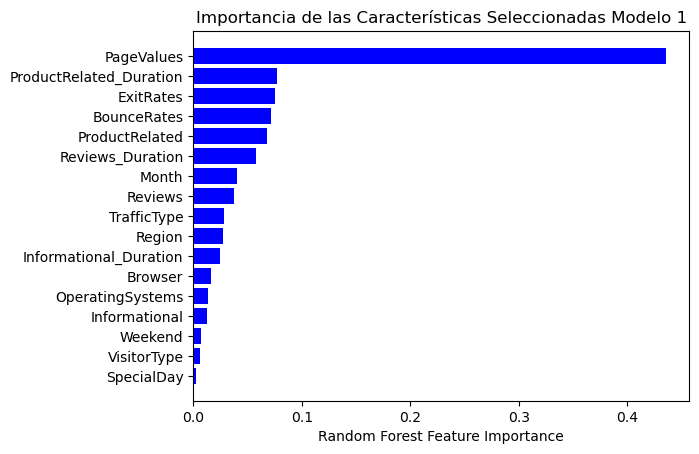

In [124]:
# Importancia de las variables
importance = ranfor.feature_importances_
sorted_idx = ranfor.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], importance[sorted_idx], color='blue')
plt.xlabel("Random Forest Feature Importance")
plt.title('Importancia de las Características Seleccionadas Modelo 1')

## Selección de variables

In [72]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

#Selector de variables con Lasso
sel_ = SelectFromModel(Lasso(alpha=1.5))
sel_.fit(x_train, y_train)

#Imprimir coeficientes del estimador
print("Coeficientes del estimador Lasso:")
print(sel_.estimator_.coef_)

#Obtener variables seleccionadas
best_features = X.columns[sel_.get_support()]
print(best_features)

Coeficientes del estimador Lasso:
[ 0.00000000e+00  1.39668775e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.35134808e-05 -0.00000000e+00 -0.00000000e+00
  5.13265719e-03 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00]
Index(['Reviews_Duration', 'ProductRelated_Duration', 'PageValues'], dtype='object')


Las variables 'Reviews_Duration', 'ProductRelated_Duration' y 'PageValues' son las más relevantes según el modelo Lasso y tienen un impacto significativo en la variable objetivo.
Las otras variables, cuyos coeficientes son cero o muy cercanos a cero, pueden ser menos importantes para el modelo y pueden ser candidatas para ser eliminadas.

## Modelo 2. Regresión lineal múltiple con selección de variables

In [73]:
#Filtrar X_train y Y_train para eliminar variables con coeficiente 0
X_new_train = sel_.transform(x_train)
X_new_test = sel_.transform(x_test)

In [102]:
#Crea el modelo
regr1 = LinearRegression()
#Calibra el modelo
regr1.fit(X_new_train, y_train)
#Realice predicciones sobre x_train_std
y_pred_r2 = regr1.predict(X_new_train)

#Exactitud de modelo
print("Accuracy (Train): "+ str(regr1.score(X_new_train,y_train)*100) + "%")
#Metricas de desempeño de entrenamiento
print("MSE entrenamiento: {}".format(mean_squared_error(y_train, y_pred_r2)))
print("MAE entrenamiento: {}".format(mean_absolute_error(y_train, y_pred_r2)))
print("R2 entrenamiento: {}".format(r2_score(y_train, y_pred_r2)*100))

#Predicciones sobre el conjunto de test
y_hat_r2 = regr1.predict(X_new_test)
#Exactitud de modelo
print("\nAccuracy (Test): "+ str(regr1.score(X_new_test,y_test)*100) + "%")
#Metricas de desempeño de validación
print("MSE validación: {}".format(mean_squared_error(y_test, y_hat_r2)))
print("MAE validación: {}".format(mean_absolute_error(y_test, y_hat_r2)))
print("R2 validación: {}".format(r2_score(y_test, y_hat_r2)*100))


Accuracy (Train): 25.796491900956863%
MSE entrenamiento: 0.09805532642273965
MAE entrenamiento: 0.20256115188524898
R2 entrenamiento: 25.796491900956863

Accuracy (Test): 25.599560145599686%
MSE validación: 0.09737130084768136
MAE validación: 0.20212371432132967
R2 validación: 25.599560145599686


## Modelo 3. Random Forest con selección de variables

In [75]:
# Crea el modelo 
ranfor_sel = RandomForestRegressor(
    n_estimators=200,
    max_depth=20, 
    random_state=45
)

# Calibra el modelo
ranfor_sel.fit(X_new_train, y_train)

# Predicciones sobre el conjunto de train con características seleccionadas
y_pred_r_sel_train = ranfor_sel.predict(X_new_train)

# Exactitud de modelo para el conjunto de entrenamiento con características seleccionadas
print("Accuracy (Train - Selected Features): "+ str(ranfor_sel.score(X_new_train,y_train)*100) + "%")

# Métricas de desempeño de entrenamiento para el conjunto de entrenamiento con características seleccionadas
print("Mean squared error (Train - Selected Features): %.2f" % mean_squared_error(y_train, y_pred_r_sel_train))
print("Mean absolute error (Train - Selected Features): %.2f" % mean_absolute_error(y_train, y_pred_r_sel_train))
r2 = r2_score(y_train, y_pred_r_sel_train)
adj_r2 = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-X_new_train.shape[1]-1)
print("R2 (Train - Selected Features): %.2f" % (r2*100))
print("R2-adjusted (Train - Selected Features): %.2f" % (adj_r2*100))

# Predicciones sobre el conjunto de test con características seleccionadas
y_pred_r_sel_test = ranfor_sel.predict(X_new_test)

# Exactitud de modelo para el conjunto de prueba con características seleccionadas
print("Accuracy (Test - Selected Features): "+ str(ranfor_sel.score(X_new_test,y_test)*100) + "%")

# Métricas de desempeño de validación para el conjunto de prueba con características seleccionadas
print("Mean squared error (Test - Selected Features): %.2f" % mean_squared_error(y_test, y_pred_r_sel_test))
print("Mean absolute error (Test - Selected Features): %.2f" % mean_absolute_error(y_test, y_pred_r_sel_test))
r2 = r2_score(y_test, y_pred_r_sel_test)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_new_test.shape[1]-1)
print("R2 (Test - Selected Features): %.2f" % (r2*100))
print("R2-adjusted (Test - Selected Features): %.2f" % (adj_r2*100))

Accuracy (Train - Selected Features): 88.78887362221434%
Mean squared error (Train - Selected Features): 0.01
Mean absolute error (Train - Selected Features): 0.06
R2 (Train - Selected Features): 88.79
R2-adjusted (Train - Selected Features): 88.79
Accuracy (Test - Selected Features): 34.48084226155819%
Mean squared error (Test - Selected Features): 0.09
Mean absolute error (Test - Selected Features): 0.15
R2 (Test - Selected Features): 34.48
R2-adjusted (Test - Selected Features): 34.40


## Modelo 4 Tunning de hiperparámetros

In [76]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150],  # Número de árboles en el bosque
    'max_depth': [None, 5, 10, 15],   # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],   # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],     # Número mínimo de muestras requeridas en cada hoja
    'bootstrap': [True, False]         # Método de muestreo de instancias
}

# Crear el modelo de Random Forest
rf = RandomForestRegressor(random_state=45)

# Configurar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, cv=5, verbose=2, random_state=45, n_jobs=-1)

# Realizar la búsqueda aleatoria de hiperparámetros
random_search.fit(x_train, y_train)

# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Obtener el mejor modelo
best_rf_model = random_search.best_estimator_


# Calcular métricas con el conjunto de entrenamiento
y_pred_train = best_rf_model.predict(x_train)
print("Métricas con el conjunto de entrenamiento:")
print("Accuracy (Train): "+ str(best_rf_model.score(x_train,y_train)*100) + "%")
print("Mean squared error (Train): %.2f" % mean_squared_error(y_train, y_pred_train))
print("Mean absolute error (Train): %.2f" % mean_absolute_error(y_train, y_pred_train))
r2 = r2_score(y_train, y_pred_train)
adj_r2 = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print("R2 (Train): %.2f" % (r2*100))
print("R2-adjusted (Train): %.2f" % (adj_r2*100))

# Calcular métricas con el conjunto de validación
y_pred_test = best_rf_model.predict(x_test)
print("\nMétricas con el conjunto de validación:")
print("Accuracy (Test): "+ str(best_rf_model.score(x_test,y_test)*100) + "%")
print("Mean squared error (Validation): %.2f" % mean_squared_error(y_test, y_pred_test))
print("Mean absolute error (Validation): %.2f" % mean_absolute_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("R2 (Validation): %.2f" % (r2*100))
print("R2-adjusted (Validación): %.2f" % (adj_r2*100))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores hiperparámetros encontrados:
{'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5, 'bootstrap': True}
Métricas con el conjunto de entrenamiento:
Accuracy (Train): 51.40521614429934%
Mean squared error (Train): 0.06
Mean absolute error (Train): 0.13
R2 (Train): 51.41
R2-adjusted (Train): 51.32

Métricas con el conjunto de validación:
Accuracy (Test): 45.35865054384046%
Mean squared error (Validation): 0.07
Mean absolute error (Validation): 0.14
R2 (Validation): 45.36
R2-adjusted (Validación): 44.98


In [35]:
# realizaremos tratamiento de datos atípicos, para verificar si mejoran los resultados de los modelos. 
df2 = nuevo_df.copy()
df2.describe()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,5.168046,2.124211,2.357804,3.153298,4.073904,1.715936,0.234248,0.156329
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,2.374071,0.906823,1.710114,2.402340,4.016654,0.693425,0.423545,0.363182
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,7.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


In [36]:
# Definición de función que utiliza RIC para la detección de valores atípicos
def outlier_IQR(df, column, thr):
    Q1 = np.quantile(df2[column], 0.25) # first quartile
    Q3 = np.quantile(df2[column], 0.75) # third quartile
    IQR = Q3 - Q1 # inter - quartile range
    threshold = thr * IQR # defining the threshold
    lower = Q1 - threshold
    upper = Q3 + threshold
    lower_bound = df2[df2[column] < lower]
    upper_bound = df2[df2[column] > upper]

    #Imprimir IQR, threshold, lower bound, upper bound and total number of outlier
    print('IQR is:', IQR)
    print('Threshold is:', threshold)
    print('Lower bound is:', lower)
    print('Upper bound is:', upper)
    print('total number of outliers are:', lower_bound.shape[0] + upper_bound.shape[0])
    return upper, lower

In [37]:
#Obtener el IQR, el umbral, el límite inferior, el límite superior, el total de valores atípicos
upper_PageValues, lower_PageValues = outlier_IQR(df2, 'PageValues', 2)

# Eliminar valores atipicos para columna bmi
print('Antes de eliminación de Outliers:', df2.shape)
df3 = df2.loc[(df2['PageValues'] < upper_PageValues) & (df2['PageValues'] > lower_PageValues)]
print('Después de eliminación Outliers:', df3.shape)

IQR is: 0.0
Threshold is: 0.0
Lower bound is: 0.0
Upper bound is: 0.0
total number of outliers are: 2730
Antes de eliminación de Outliers: (12205, 18)
Después de eliminación Outliers: (0, 18)


El rango intercuartílico (IQR) para la columna 'PageValues' es de 0.0. Esto significa que no hay variabilidad en los datos, ya que todos los valores son similares. Por lo tanto, el umbral para detectar valores atípicos también es 0.0, lo que hace que no haya límites superior o inferior distintos de cero. Como resultado, todos los valores se consideran atípicos según este enfoque.

## Nueva selección de características
Variance Threshold

In [43]:
from sklearn.feature_selection import VarianceThreshold

#Función de filtro de caracteristicas
def variance_threshold(X,th):
    var_thres=VarianceThreshold(threshold=th)
    var_thres.fit(X)
    new_cols = var_thres.get_support()
    return new_cols

In [44]:
# Para regresión
# Obtener columnas seleccionadas
X_new_reg = variance_threshold(X, 0.25)
# Nuevo dataframe
df_regression_new = X.iloc[:,X_new_reg]
df_regression_new.head()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType
0,0,0.0,0,0.0,1,0.000000,0.0,2,1,1,1,1,2
1,0,0.0,0,0.0,2,64.000000,0.0,2,2,2,1,2,2
2,0,0.0,0,0.0,1,0.000000,0.0,2,4,1,9,3,2
3,0,0.0,0,0.0,2,2.666667,0.0,2,3,2,2,4,2
4,0,0.0,0,0.0,10,627.500000,0.0,2,3,3,1,4,2


## Modelo 5 Regresión lineal multiples con caracteristicas Variance Threshold

In [125]:
# Añadir la variable objetivo al DataFrame df_regression_new
df_regression_new['Purchase'] = nuevo_df['Purchase']

# Separar las características y la variable objetivo
variables = df_regression_new.drop('Purchase', axis=1)
objetivo = df_regression_new['Purchase']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(variables,objetivo , test_size=0.2, random_state=42)

# Inicializar el modelo de regresión lineal
modelo_regresion = LinearRegression()

# Entrenar el modelo
modelo_regresion.fit(X_entrenamiento, y_entrenamiento)

# Predecir los valores para el conjunto de entrenamiento y validación
y_t_pred = modelo_regresion.predict(X_entrenamiento)
y_te_pred = modelo_regresion.predict(X_prueba)

# Calcular R^2 para el conjunto de entrenamiento y prueba
r2_train = r2_score(y_entrenamiento, y_t_pred)
r2_test = r2_score(y_prueba, y_te_pred)

# Calcular MAE para el conjunto de entrenamiento y prueba
mae_train = mean_absolute_error(y_entrenamiento, y_t_pred)
mae_test = mean_absolute_error(y_prueba, y_te_pred)

# Calcular MSE para el conjunto de entrenamiento y prueba
mse_train = mean_squared_error(y_entrenamiento, y_t_pred)
mse_test = mean_squared_error(y_prueba, y_te_pred)
#Exactitud de modelo
print("Accuracy (Train): "+ str(modelo_regresion.score(X_entrenamiento,y_entrenamiento)*100) + "%")
#Exactitud de modelo
print("Accuracy (Test): "+ str(modelo_regresion.score(X_prueba,y_prueba)*100) + "%")
print("Métricas del modelo:")
print("R2 score en el conjunto de entrenamiento:", r2_train*100)
print("R2 score en el conjunto de prueba:", r2_test*100)
print("MAE (Mean Absolute Error) en el conjunto de entrenamiento:", mae_train)
print("MAE (Mean Absolute Error) en el conjunto de prueba:", mae_test)
print("MSE (Mean Squared Error) en el conjunto de entrenamiento:", mse_train)
print("MSE (Mean Squared Error) en el conjunto de prueba:", mse_test)

Accuracy (Train): 26.995984506780303%
Accuracy (Test): 26.820169949491902%
Métricas del modelo:
R2 score en el conjunto de entrenamiento: 26.995984506780303
R2 score en el conjunto de prueba: 26.820169949491902
MAE (Mean Absolute Error) en el conjunto de entrenamiento: 0.20066303634238034
MAE (Mean Absolute Error) en el conjunto de prueba: 0.19526569270688016
MSE (Mean Squared Error) en el conjunto de entrenamiento: 0.09728969314429613
MSE (Mean Squared Error) en el conjunto de prueba: 0.09243126517706826


## Modelo 6  RandomForest con caracteristicas Variance Threshold

In [104]:
from sklearn.ensemble import RandomForestRegressor

# Añadir la variable objetivo al DataFrame df_regression_new
df_regression_new['Purchase'] = nuevo_df['Purchase']

# Separar las características y la variable objetivo
variables = df_regression_new.drop('Purchase', axis=1)
objetivo = df_regression_new['Purchase']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento,y_prueba  = train_test_split(variables,objetivo , test_size=0.2, random_state=42)

# Inicializar el modelo Random Forest Regressor
modelo_random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
modelo_random_forest.fit(X_entrenamiento, y_entrenamiento)

# Predecir los valores para el conjunto de entrenamiento y validación
y_tra_pred = modelo_random_forest.predict(X_entrenamiento)
y_tes_pred = modelo_random_forest.predict(X_prueba)

# Calcular R^2 para el conjunto de entrenamiento y prueba
r2_train = r2_score(y_entrenamiento, y_tra_pred)
r2_test = r2_score(y_prueba, y_tes_pred)

# Calcular MAE para el conjunto de entrenamiento y prueba
mae_train = mean_absolute_error(y_entrenamiento, y_tra_pred)
mae_test = mean_absolute_error(y_prueba, y_tes_pred)

# Calcular MSE para el conjunto de entrenamiento y prueba
mse_train = mean_squared_error(y_entrenamiento, y_tra_pred)
mse_test = mean_squared_error(y_prueba, y_tes_pred)

print("Accuracy (Train): "+ str(modelo_random_forest.score(X_entrenamiento,y_entrenamiento)*100) + "%")
print("Accuracy (Test): "+ str(modelo_random_forest.score(X_prueba,y_prueba)*100) + "%")

print("Métricas del modelo Random Forest Regressor:")
print("R2 score en el conjunto de entrenamiento:", r2_train*100)
print("R2 score en el conjunto de prueba:", r2_test*100)
print("MAE (Mean Absolute Error) en el conjunto de entrenamiento:", mae_train)
print("MAE (Mean Absolute Error) en el conjunto de prueba:", mae_test)
print("MSE (Mean Squared Error) en el conjunto de entrenamiento:", mse_train)
print("MSE (Mean Squared Error) en el conjunto de prueba:", mse_test)

Accuracy (Train): 92.00751692636963%
Accuracy (Test): 40.54293961716613%
Métricas del modelo Random Forest Regressor:
R2 score en el conjunto de entrenamiento: 92.00751692636963
R2 score en el conjunto de prueba: 40.54293961716613
MAE (Mean Absolute Error) en el conjunto de entrenamiento: 0.05440905366653011
MAE (Mean Absolute Error) en el conjunto de prueba: 0.1451249487914789
MSE (Mean Squared Error) en el conjunto de entrenamiento: 0.010651280213027449
MSE (Mean Squared Error) en el conjunto de prueba: 0.07509844326095863


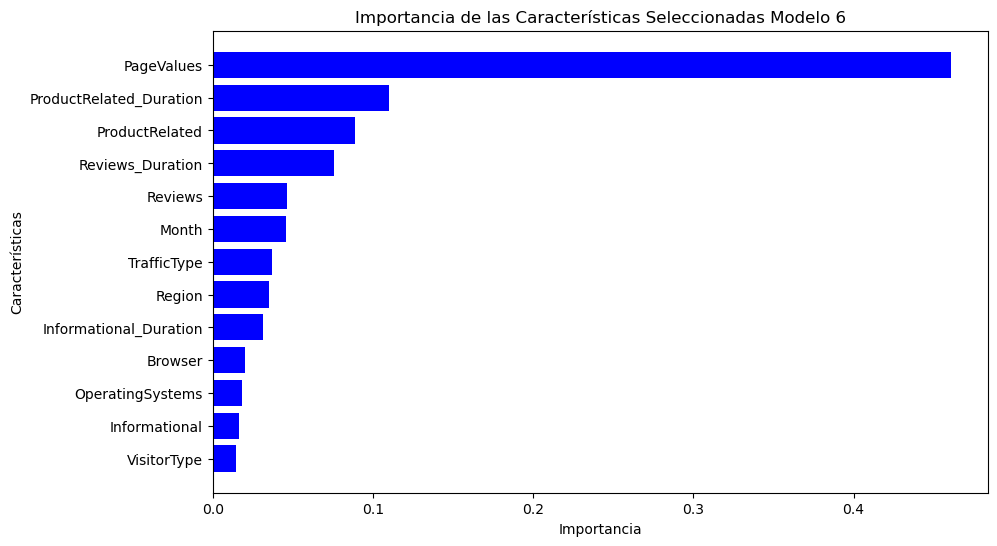

In [122]:
# Obtener la importancia de las características
importancia_caracteristicas = modelo_random_forest.feature_importances_

# Obtener el nombre de las características seleccionadas
nombres_caracteristicas = df_regression_new.columns

# Ordenar la importancia de las características y sus nombres de forma descendente
indices_ordenados = importancia_caracteristicas.argsort()[::-1]
importancia_caracteristicas_ordenada = importancia_caracteristicas[indices_ordenados]
nombres_caracteristicas_ordenados = nombres_caracteristicas[indices_ordenados]

# Graficar la importancia de las características ordenadas de mayor a menor
plt.figure(figsize=(10, 6))
plt.barh(range(len(importancia_caracteristicas_ordenada)), importancia_caracteristicas_ordenada, align='center',color='blue')
plt.yticks(range(len(importancia_caracteristicas_ordenada)), nombres_caracteristicas_ordenados)
plt.ylabel('Características')
plt.xlabel('Importancia')
plt.title('Importancia de las Características Seleccionadas Modelo 6')
plt.gca().invert_yaxis()  # Invertir el eje y para que las características más importantes estén arriba
plt.show()

## Comparación de modelos

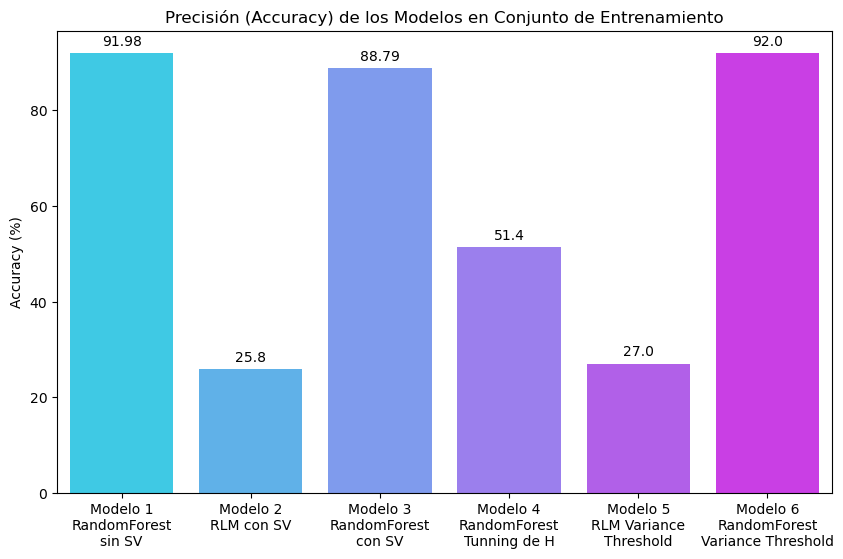

In [86]:
# Gráfico de barras comparativo de la precisión en los conjuntos de entrenamiento
accuracies = [91.98, 25.80, 88.79, 51.40, 26.995, 92.00]
models = ['Modelo 1\nRandomForest\nsin SV', 'Modelo 2\nRLM con SV', 'Modelo 3\nRandomForest\ncon SV', 'Modelo 4\nRandomForest\nTunning de H', 'Modelo 5\nRLM Variance\nThreshold', 'Modelo 6\nRandomForest\nVariance Threshold' ]
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='cool')
plt.title('Precisión (Accuracy) de los Modelos en Conjunto de Entrenamiento')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=0)
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, str(round(v, 2)), ha='center', va='bottom', fontsize=10)
plt.show()

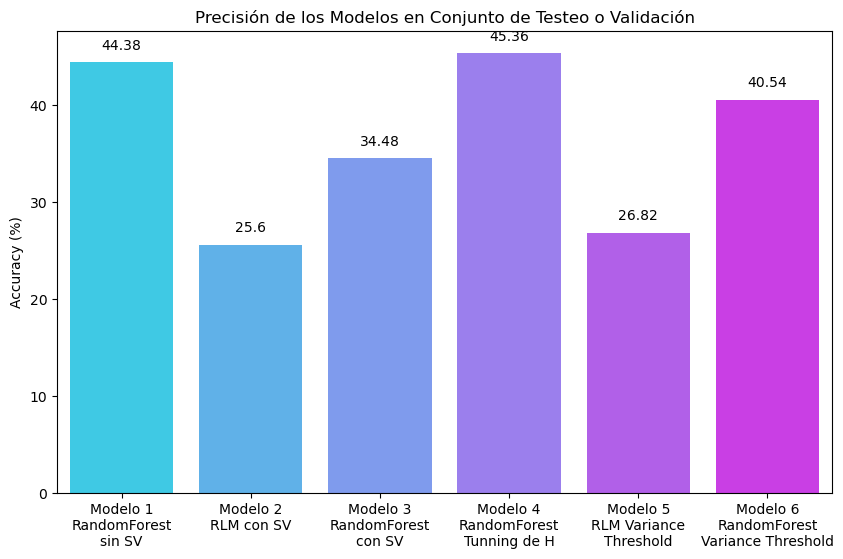

In [87]:
# Precisión en el conjunto de testeo o validación
accuracies_test = [44.38, 25.60, 34.48, 45.36, 26.82, 40.54]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies_test, palette='cool')
plt.title('Precisión de los Modelos en Conjunto de Testeo o Validación')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=0)
for i, v in enumerate(accuracies_test):
    plt.text(i, v + 1, str(round(v, 2)), ha='center', va='bottom', fontsize=10)
plt.show()

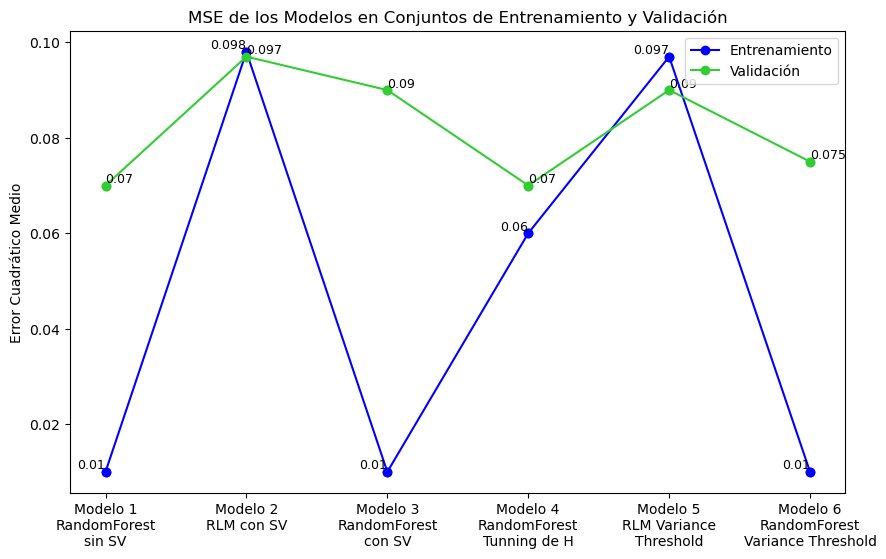

In [115]:
# Gráfico comparativo de MSE en los conjuntos de entrenamiento y validación
mse_train = [0.01, 0.098, 0.01, 0.06, 0.097, 0.010]
mse_val = [0.07, 0.097, 0.09, 0.07, 0.09, 0.075]
plt.figure(figsize=(10, 6))
plt.plot(models, mse_train, marker='o',color='blue' , label='Entrenamiento')
plt.plot(models, mse_val, marker='o', color='limegreen', label='Validación')
plt.title('MSE de los Modelos en Conjuntos de Entrenamiento y Validación')
plt.ylabel('Error Cuadrático Medio')
plt.xticks(rotation=0)
plt.legend()
# Graficar los puntos y agregar etiquetas de número
for i, (x, y) in enumerate(zip(models, mse_train)):
    plt.plot(x, y, marker='o', color='blue')  # Graficar punto
    plt.text(x, y, f'{y}', fontsize=9, ha='right', va='bottom')  # Agregar etiqueta de número

for i, (x, y) in enumerate(zip(models, mse_val)):
    plt.plot(x, y, marker='o', color='limegreen')  # Graficar punto
    plt.text(x, y, f'{y}', fontsize=9, ha='left', va='bottom')  # Agregar etiqueta de número

plt.show()

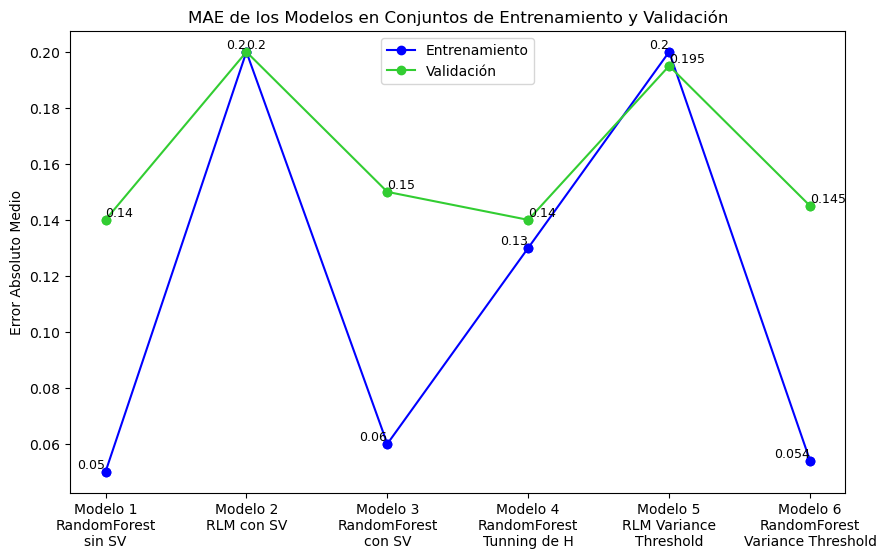

In [116]:
# Gráfico comparativo de MAE en los conjuntos de entrenamiento y validación
mae_train = [0.05, 0.20, 0.06, 0.13, 0.200, 0.054]
mae_val = [0.14, 0.20, 0.15, 0.14, 0.195, 0.145]
plt.figure(figsize=(10, 6))
plt.plot(models, mae_train, marker='o',color='blue' ,label='Entrenamiento')
plt.plot(models, mae_val, marker='o', color='limegreen',label='Validación')
plt.title('MAE de los Modelos en Conjuntos de Entrenamiento y Validación')
plt.ylabel('Error Absoluto Medio')
plt.xticks(rotation=0)
plt.legend()
# Graficar los puntos y agregar etiquetas de número
for i, (x, y) in enumerate(zip(models, mae_train)):
    plt.plot(x, y, marker='o', color='blue')  # Graficar punto
    plt.text(x, y, f'{y}', fontsize=9, ha='right', va='bottom')  # Agregar etiqueta de número

for i, (x, y) in enumerate(zip(models, mae_val)):
    plt.plot(x, y, marker='o', color='limegreen')  # Graficar punto
    plt.text(x, y, f'{y}', fontsize=9, ha='left', va='bottom')  # Agregar etiqueta de número

plt.show()

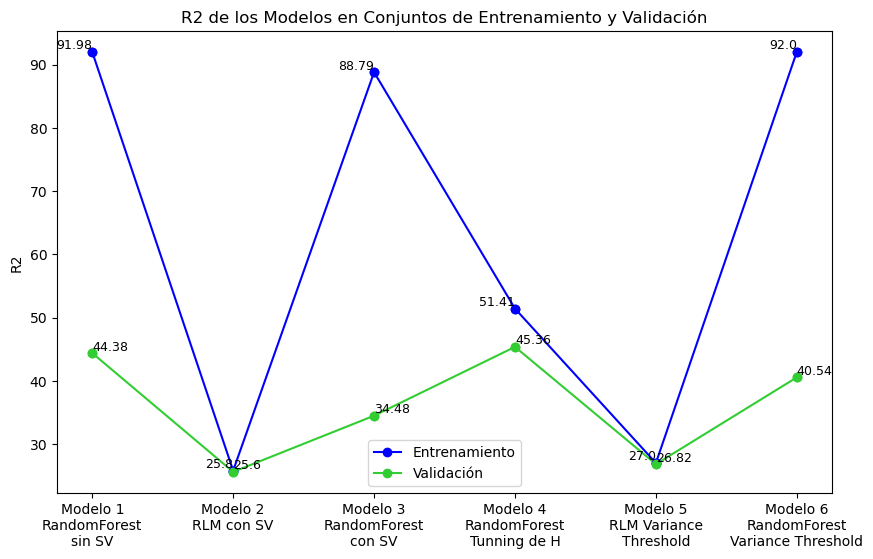

In [117]:
# Gráfico comparativo de R2 en los conjuntos de entrenamiento y validación
R2_train = [91.98, 25.80, 88.79, 51.41, 27.0, 92.00]
R2_val = [44.38, 25.60, 34.48, 45.36, 26.82, 40.54]
plt.figure(figsize=(10, 6))
plt.plot(models, R2_train, marker='o', color='blue', label='Entrenamiento')
plt.plot(models, R2_val, marker='o', color='limegreen',label='Validación')
plt.title('R2 de los Modelos en Conjuntos de Entrenamiento y Validación')
plt.ylabel('R2')
plt.xticks(rotation=0)
plt.legend()
# Graficar los puntos y agregar etiquetas de número
for i, (x, y) in enumerate(zip(models, R2_train)):
    plt.plot(x, y, marker='o', color='blue')  # Graficar punto
    plt.text(x, y, f'{y}', fontsize=9, ha='right', va='bottom')  # Agregar etiqueta de número

for i, (x, y) in enumerate(zip(models, R2_val)):
    plt.plot(x, y, marker='o', color='limegreen')  # Graficar punto
    plt.text(x, y, f'{y}', fontsize=9, ha='left', va='bottom')  # Agregar etiqueta de número

plt.show()